In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import abroad.machine_learning as ML
import os
from datetime import datetime

In [2]:
df7_dir = './data/df_7/'
df13_dir = './data/df_13/'

## All Artefacts ##

In [3]:
targets = {"All": ['Control', 'Horizontal', 'Vertical', 'Pressure',
                         'Frown', 'Ambient Light', 'Torch Light'],
          "Light":['Control', 'Ambient Light', 'Torch Light'],
      "Motion":['Control', 'Horizontal', 'Vertical', 'Pressure',
                         'Frown']}

artefact_key = {"All": " ",
               "Light": " light ",
               "Motion": " motion "}

In [13]:
features = [{"data":pd.read_csv(os.path.join(df7_dir,'parallel_features_7_%s.csv'%(x)), index_col=0),"sensor": 7, "targets":targets[x], "artefact": artefact_key[x]} for x  in ['All', 'Light', 'Motion']]

In [14]:
features.extend([{"data":pd.read_csv(os.path.join(df13_dir,'parallel_features_13_%s.csv'%(x)), index_col=0),"sensor": 13, "targets":targets[x], "artefact": artefact_key[x]} for x  in ['All', 'Light', 'Motion']])

In [15]:
print("Number of datasets: %d" % (len(features),))

Number of datasets: 6


In [16]:
def pipeline(features):
    dt = datetime.now()
    date ="".join(filter(lambda char: char.isdigit(), str(dt)))[:14] 
    split_data = ML.test_train_split(features['data'])
    fpr, tpr, auroc, n_classes, clf = ML.classification(split_data[0])
    ML.ROC_plot(fpr, tpr, auroc, n_classes, date , features['targets'], features['artefact'], features['sensor'], 'Training')
    fpr, tpr, auroc, n_classes = ML.final_test(split_data[1], clf)
    ML.ROC_plot(fpr, tpr, auroc, n_classes, date, features['targets'], features['artefact'], features['sensor'], 'Test')

    return True

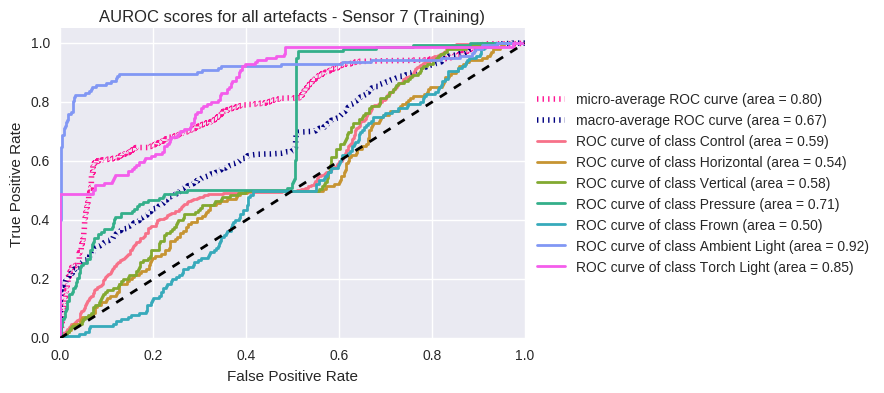

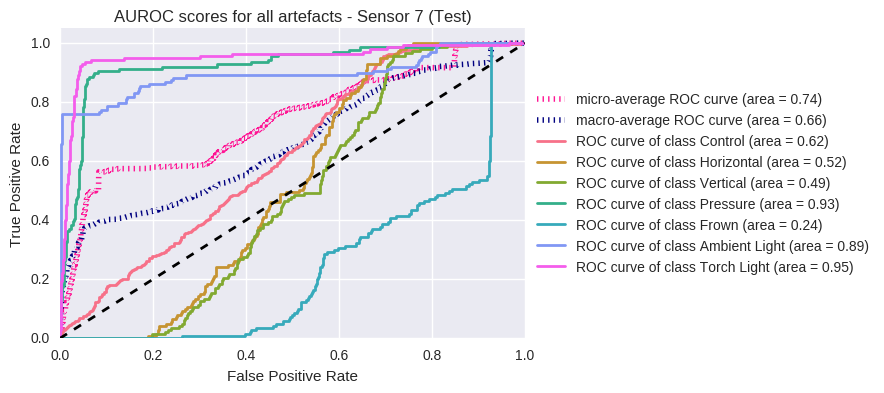

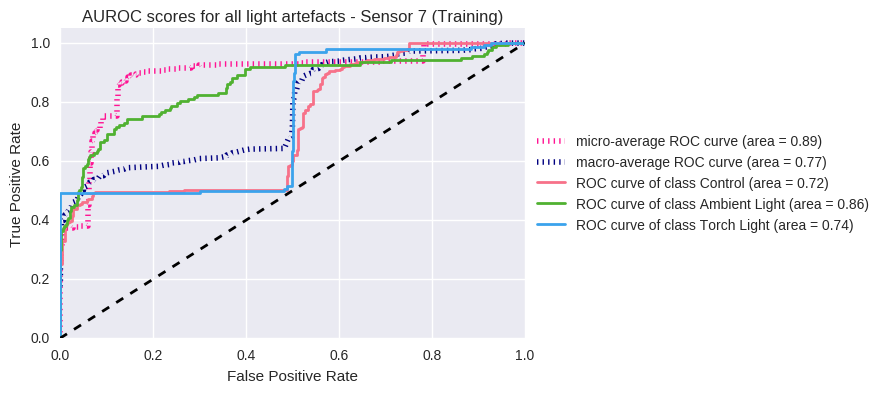

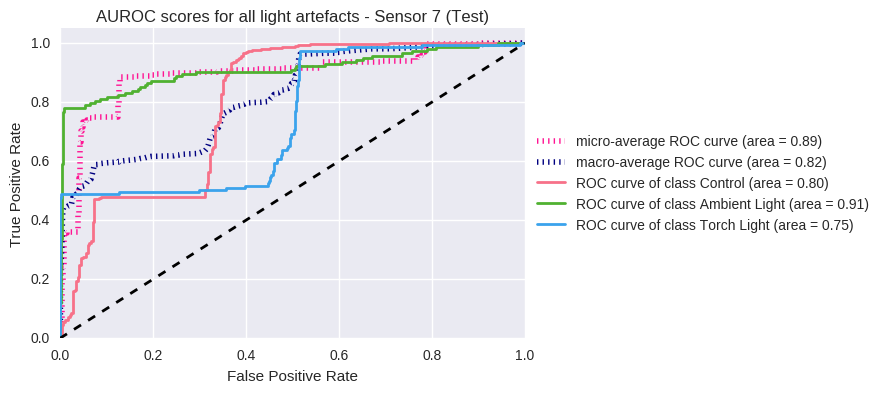

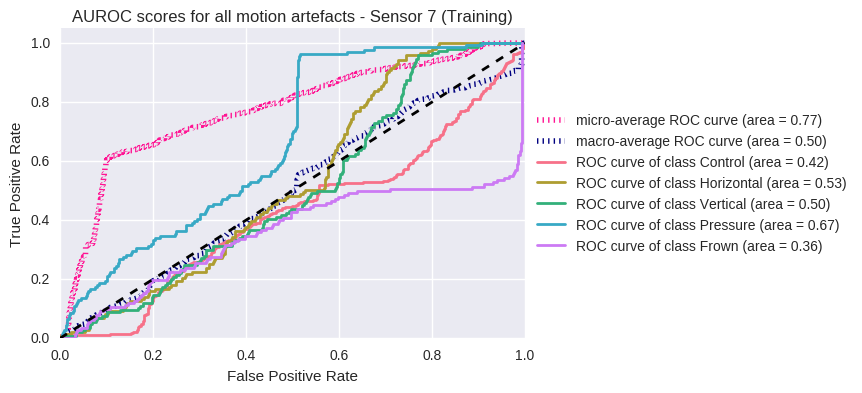

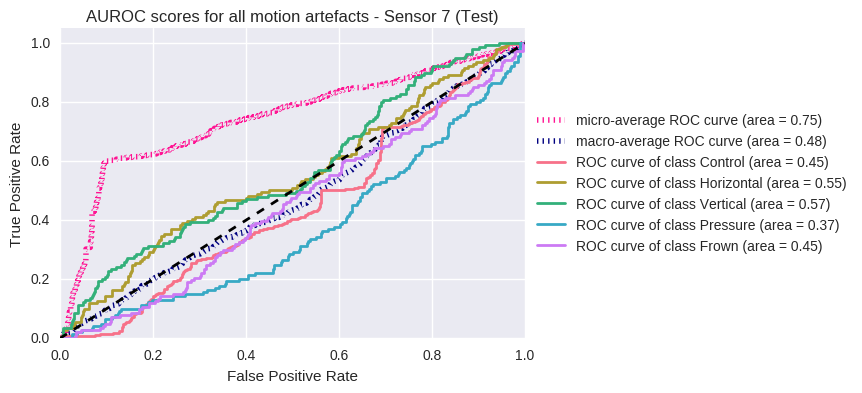

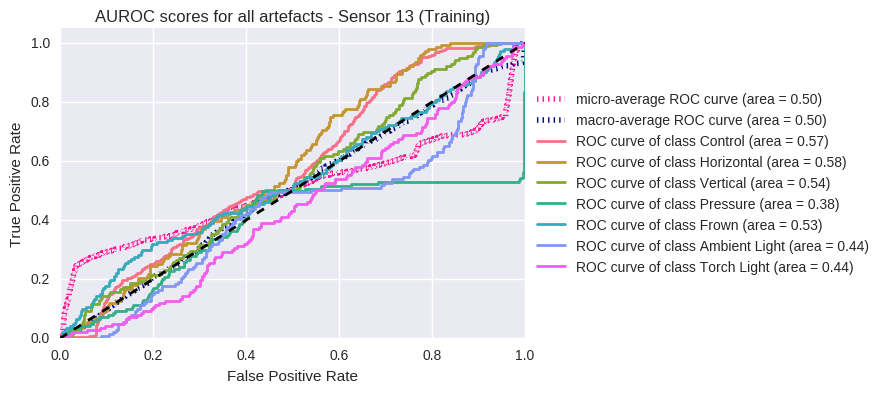

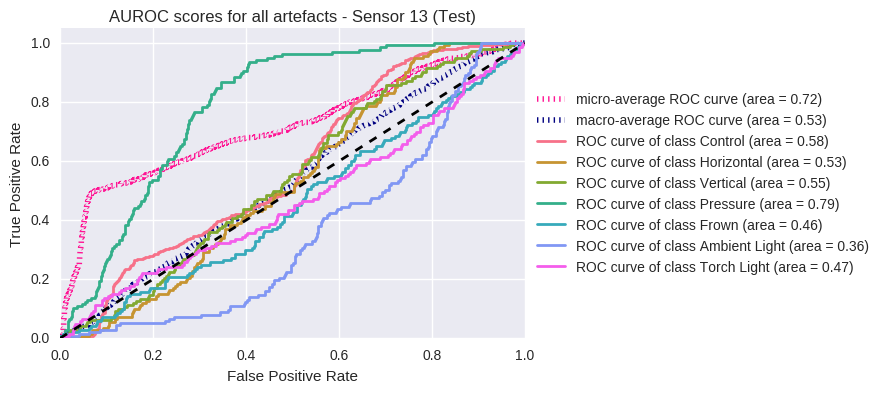

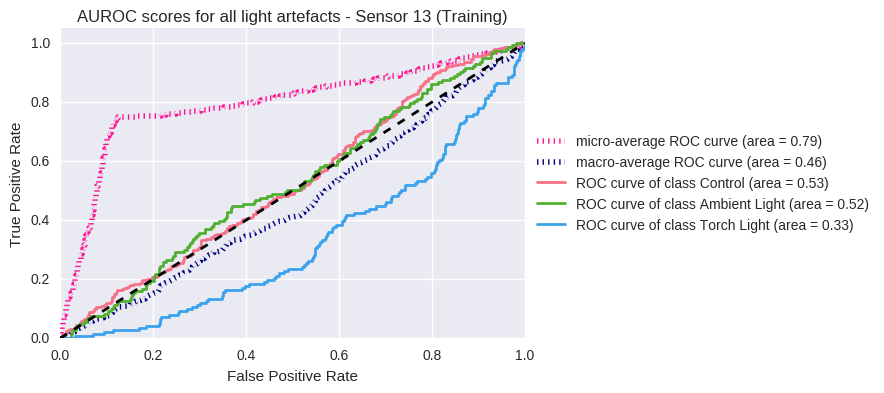

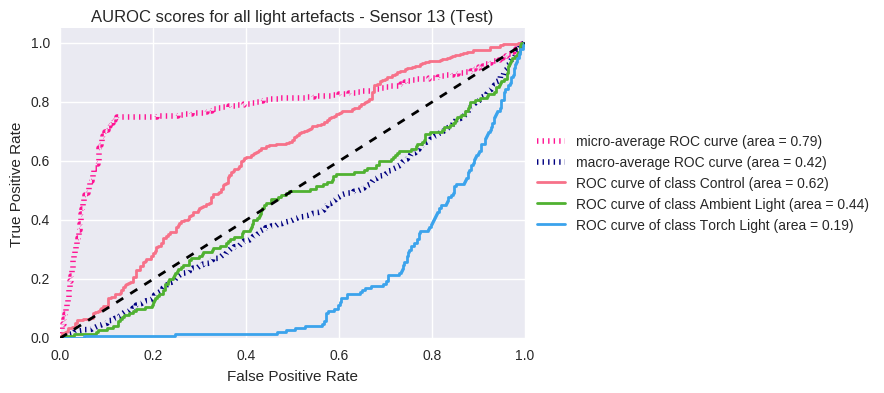

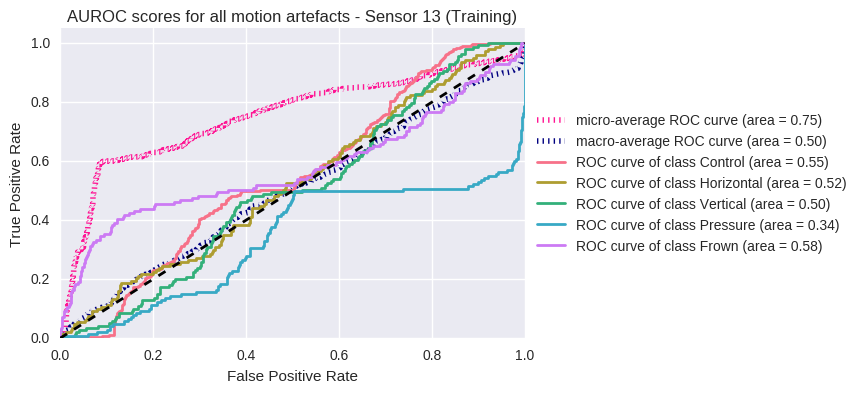

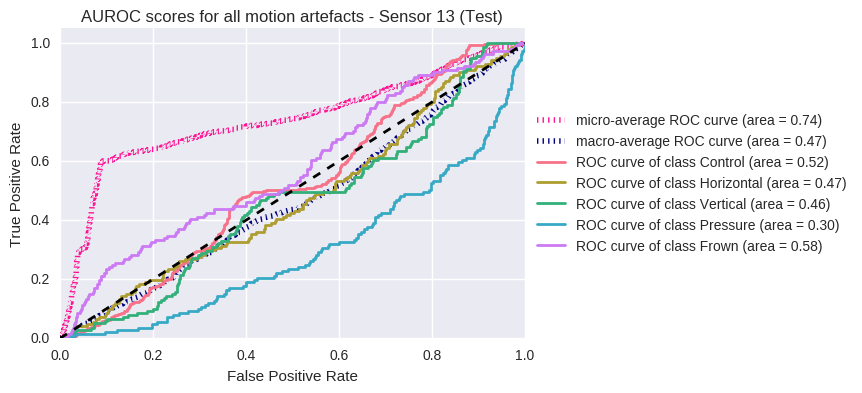

In [19]:
for df in features:
    pipeline(df)
    plt.show()

# Misc Figures

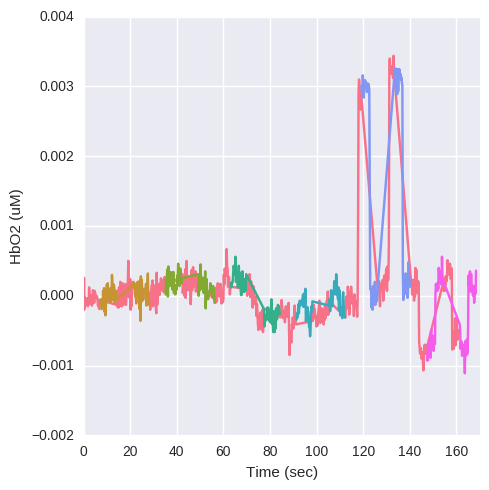

In [164]:
conc_df = pd.read_csv('./data/raw_conc_data.csv', names= ['HbO2 (uM)', 'HHb (uM)', 'oxCCO (uM)', 'HbT (uM)'], header=43)
conc_df['Time (sec)'] = np.arange(0,conc_df.shape[0]/5,0.2)
artefacts = pd.read_csv('./data/raw_sensor_7.csv', usecols=['Artefact', 'Subject'])
conc_df['Artefact'] = [artefact_names[x] for x in artefacts.Artefact[artefacts['Subject']==2]]
plt.rcParams['figure.figsize'] = (10.0, 5.0)
colors = sns.color_palette("Set1", 7)
artefact_names = ['Control', 'Horizontal Motion', 'Vertical Motion', 'Pressure', 'Frowning', 'Ambient Light', 'Torch Light']    
g = sns.FacetGrid(conc_df, hue='Artefact', size=5, xlim=(0,170))
g.map(plt.plot, 'Time (sec)', 'HbO2 (uM)')

In [162]:
len([artefact_names[x] for x in artefacts.Artefact[artefacts['Subject']==2]])

843

In [163]:
conc_df.shape

(886, 5)